# Data pipline and data visulization

## Import

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "7"

%load_ext autoreload
%autoreload 2

import jax.numpy as jnp
import numpy as np
import jax
from test import utils
from deeprte.model.tf.input_pipeline import load_tf_data
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 

In [17]:
# Path to the dataset
DATA_DIR = "/workspaces/deeprte/rte_data/matlab/train-scattering-kernel-0405/"
DATA_NAME = "train_random_kernel_g0.8_1.mat"

# slice batch by index
idx = np.random.randint(500)

data_path = os.path.join(DATA_DIR, DATA_NAME)
assert os.path.exists(f'{data_path}')

In [18]:
# load and slice batch by index
tf_data = load_tf_data(DATA_DIR, [DATA_NAME,], normalization=False)
features = jax.tree_map(lambda x: jnp.array(x), tf_data)
data_feature = features[0]
batch = utils.slice_batch(idx, data_feature)

# visualize shape
jax.tree_util.tree_map(lambda x: x.shape, batch)

{'boundary': (1, 1920),
 'boundary_coords': (1920, 4),
 'boundary_scattering_kernel': (1, 1920, 24),
 'boundary_weights': (1920,),
 'phase_coords': (38400, 4),
 'position_coords': (1600, 2),
 'psi_label': (1, 38400),
 'scattering_kernel': (1, 38400, 24),
 'self_scattering_kernel': (1, 24, 24),
 'sigma': (1, 1600, 2),
 'velocity_coords': (24, 2),
 'velocity_weights': (24,)}

In [19]:
psi_shape = utils.get_psi_shape(DATA_DIR, [DATA_NAME,])
r = batch['position_coords'].reshape(*psi_shape[:-1], 2)
psi_label = batch["psi_label"].reshape(*psi_shape)
phi_label = psi_label @ batch["velocity_weights"]

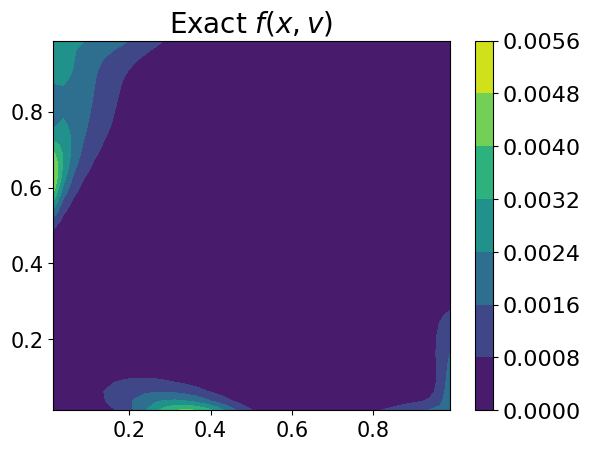

In [20]:
fig, axs = plt.subplots()
fig.subplots_adjust(hspace=0.3)

# fig = px.density_contour(phi_label)
# fig.show()

cs_1 = axs.contourf(
    r[..., 0], r[..., 1], phi_label
)
axs.set_title(r"Exact $f(x,v)$", fontsize=20)
axs.tick_params(axis="both", labelsize=15)
cbar = fig.colorbar(cs_1)
cbar.ax.tick_params(labelsize=16)

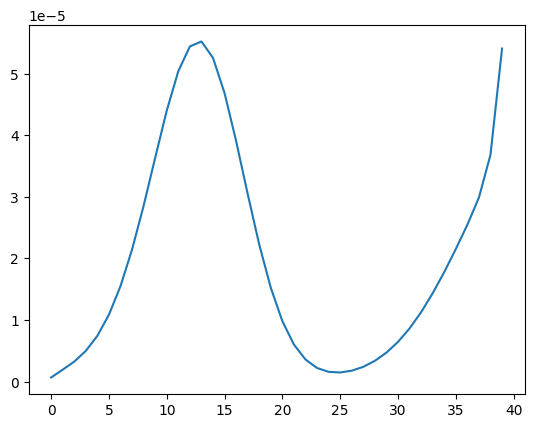

In [21]:
plt.plot(psi_label[:, 0, 0])

In [28]:
ret_3 = phi_label

In [32]:
np.allclose(ret_3, phi_label)

False

In [33]:
jnp.sqrt(
            jnp.mean((ret_3 - phi_label) ** 2)
            / jnp.mean(phi_label ** 2)
        )

DeviceArray(0.16290644, dtype=float32)

In [40]:
psi_label[0,0,:]

DeviceArray([9.9552699e-07, 4.1232233e-06, 5.1154530e-07, 4.6540373e-07,
             3.5029828e-07, 3.9655055e-07, 3.4323596e-06, 3.5338389e-06,
             5.4280063e-06, 9.9812416e-07, 1.9496056e-06, 9.8596383e-06,
             2.5685680e-05, 5.9888385e-05, 5.3849555e-05, 1.0133896e-04,
             5.6158693e-05, 8.3141807e-05, 3.8824446e-06, 6.0877857e-05,
             1.7508141e-06, 1.2183920e-05, 2.4991323e-06, 1.2393434e-06],            dtype=float32)

In [44]:
batch["self_scattering_kernel"][0,]

DeviceArray([[1.2217014 , 1.2258912 , 1.2258912 , 1.1592743 , 1.196961  ,
              1.1592743 , 1.0892569 , 1.0896633 , 0.92299134, 1.0628006 ,
              0.94356257, 0.8354342 , 0.9738053 , 0.8181137 , 0.8181137 ,
              0.76168764, 0.7356289 , 0.76168764, 1.0892569 , 0.92299134,
              1.0896633 , 0.8354342 , 0.94356257, 1.0628006 ],
             [1.2209649 , 1.4867971 , 1.3048345 , 1.5470814 , 1.4915696 ,
              1.2685368 , 0.92499274, 0.9645947 , 0.69874316, 1.003569  ,
              0.7747457 , 0.6157826 , 0.82304007, 0.6009177 , 0.69885504,
              0.54431295, 0.5684037 , 0.6853637 , 1.0876619 , 0.964753  ,
              1.3049464 , 0.8821428 , 1.1350302 , 1.3929582 ],
             [1.2209649 , 1.3048345 , 1.4867971 , 1.2685368 , 1.4915696 ,
              1.5470814 , 1.0876619 , 1.3049464 , 0.964753  , 1.3929582 ,
              1.1350302 , 0.8821428 , 0.82304007, 0.69885504, 0.6009177 ,
              0.6853637 , 0.5684037 , 0.54431295, 0.92499274